Classification of soybean genotypes in drought and saline stress environment using Decision Tree algorithm

Classify the samples as belonging to the control or stress group (Drought, Saline). Such a model will make it possible to identify whether the plant has suffered any type of stress such as drought or excess salt.


In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


In [20]:
'''
Read data and Create dataset
'''
df = pd.read_csv('data_classification.csv')

y = np.array(df['CLASS'])
Cultivar = np.array(df['CULTIVAR'])
del df['CLASS']
del df['CULTIVAR']
X = np.array(df, dtype=np.float32)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [21]:
df.shape

(552, 7)

In [22]:
df.isnull().sum()

GERM    0
SL      0
RL      0
TL      0
SDM     0
RDM     0
TDM     0
dtype: int64

In [23]:
'''
Check the best parameters
Extracted cross-validation was used to prevent a sample of the same genotype from being in both the training set and the test set.
'''

param_grid = {"n_neighbors": [3, 5, 7, 9],
              "weights": ['uniform', 'distance'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p": [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring='accuracy')
  clf.fit(X_train, y_train)

  print(clf.best_params_)
  print(clf.best_score_)

  K = K + 1

Fold 1


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.9594693877551019
Fold 2
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9592653061224489
Fold 3
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9513061224489796
Fold 4
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9553877551020408
Fold 5
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9553877551020408
Fold 6
{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.9533469387755102
Fold 7
{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.9523137254901963
Fold 8
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9622352941176471
Fold 9
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9542745098039216
Fold 10
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9523137254901961


In [24]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

train_indices = []
test_indices  = []

group_kfold = GroupKFold(n_splits=10)
knn_params = {
    'p':1,
    'n_neighbors': 5,  # Number of neighbors
    'weights': 'uniform',  # Weight function used in prediction
    'algorithm': 'auto',  # Algorithm used to compute the nearest neighbors
}

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = KNeighborsClassifier(**knn_params)  
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

Fold 1
	 Training: 
	 Acc: 0.9776 - Pr: 0.9777 - Re: 0.9776
	 Test: 
	 Acc: 0.9000 - Pr: 0.9034 - Re: 0.9000
Fold 2
	 Training: 
	 Acc: 0.9756 - Pr: 0.9756 - Re: 0.9756
	 Test: 
	 Acc: 0.9000 - Pr: 0.9231 - Re: 0.9000
Fold 3
	 Training: 
	 Acc: 0.9756 - Pr: 0.9757 - Re: 0.9756
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 4
	 Training: 
	 Acc: 0.9736 - Pr: 0.9736 - Re: 0.9736
	 Test: 
	 Acc: 0.9667 - Pr: 0.9697 - Re: 0.9667
Fold 5
	 Training: 
	 Acc: 0.9776 - Pr: 0.9776 - Re: 0.9776
	 Test: 
	 Acc: 0.9500 - Pr: 0.9507 - Re: 0.9500
Fold 6
	 Training: 
	 Acc: 0.9776 - Pr: 0.9776 - Re: 0.9776
	 Test: 
	 Acc: 0.9833 - Pr: 0.9841 - Re: 0.9833
Fold 7
	 Training: 
	 Acc: 0.9782 - Pr: 0.9782 - Re: 0.9782
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 8
	 Training: 
	 Acc: 0.9782 - Pr: 0.9783 - Re: 0.9782
	 Test: 
	 Acc: 0.9583 - Pr: 0.9583 - Re: 0.9583
Fold 9
	 Training: 
	 Acc: 0.9722 - Pr: 0.9723 - Re: 0.9722
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 10
	 Training:

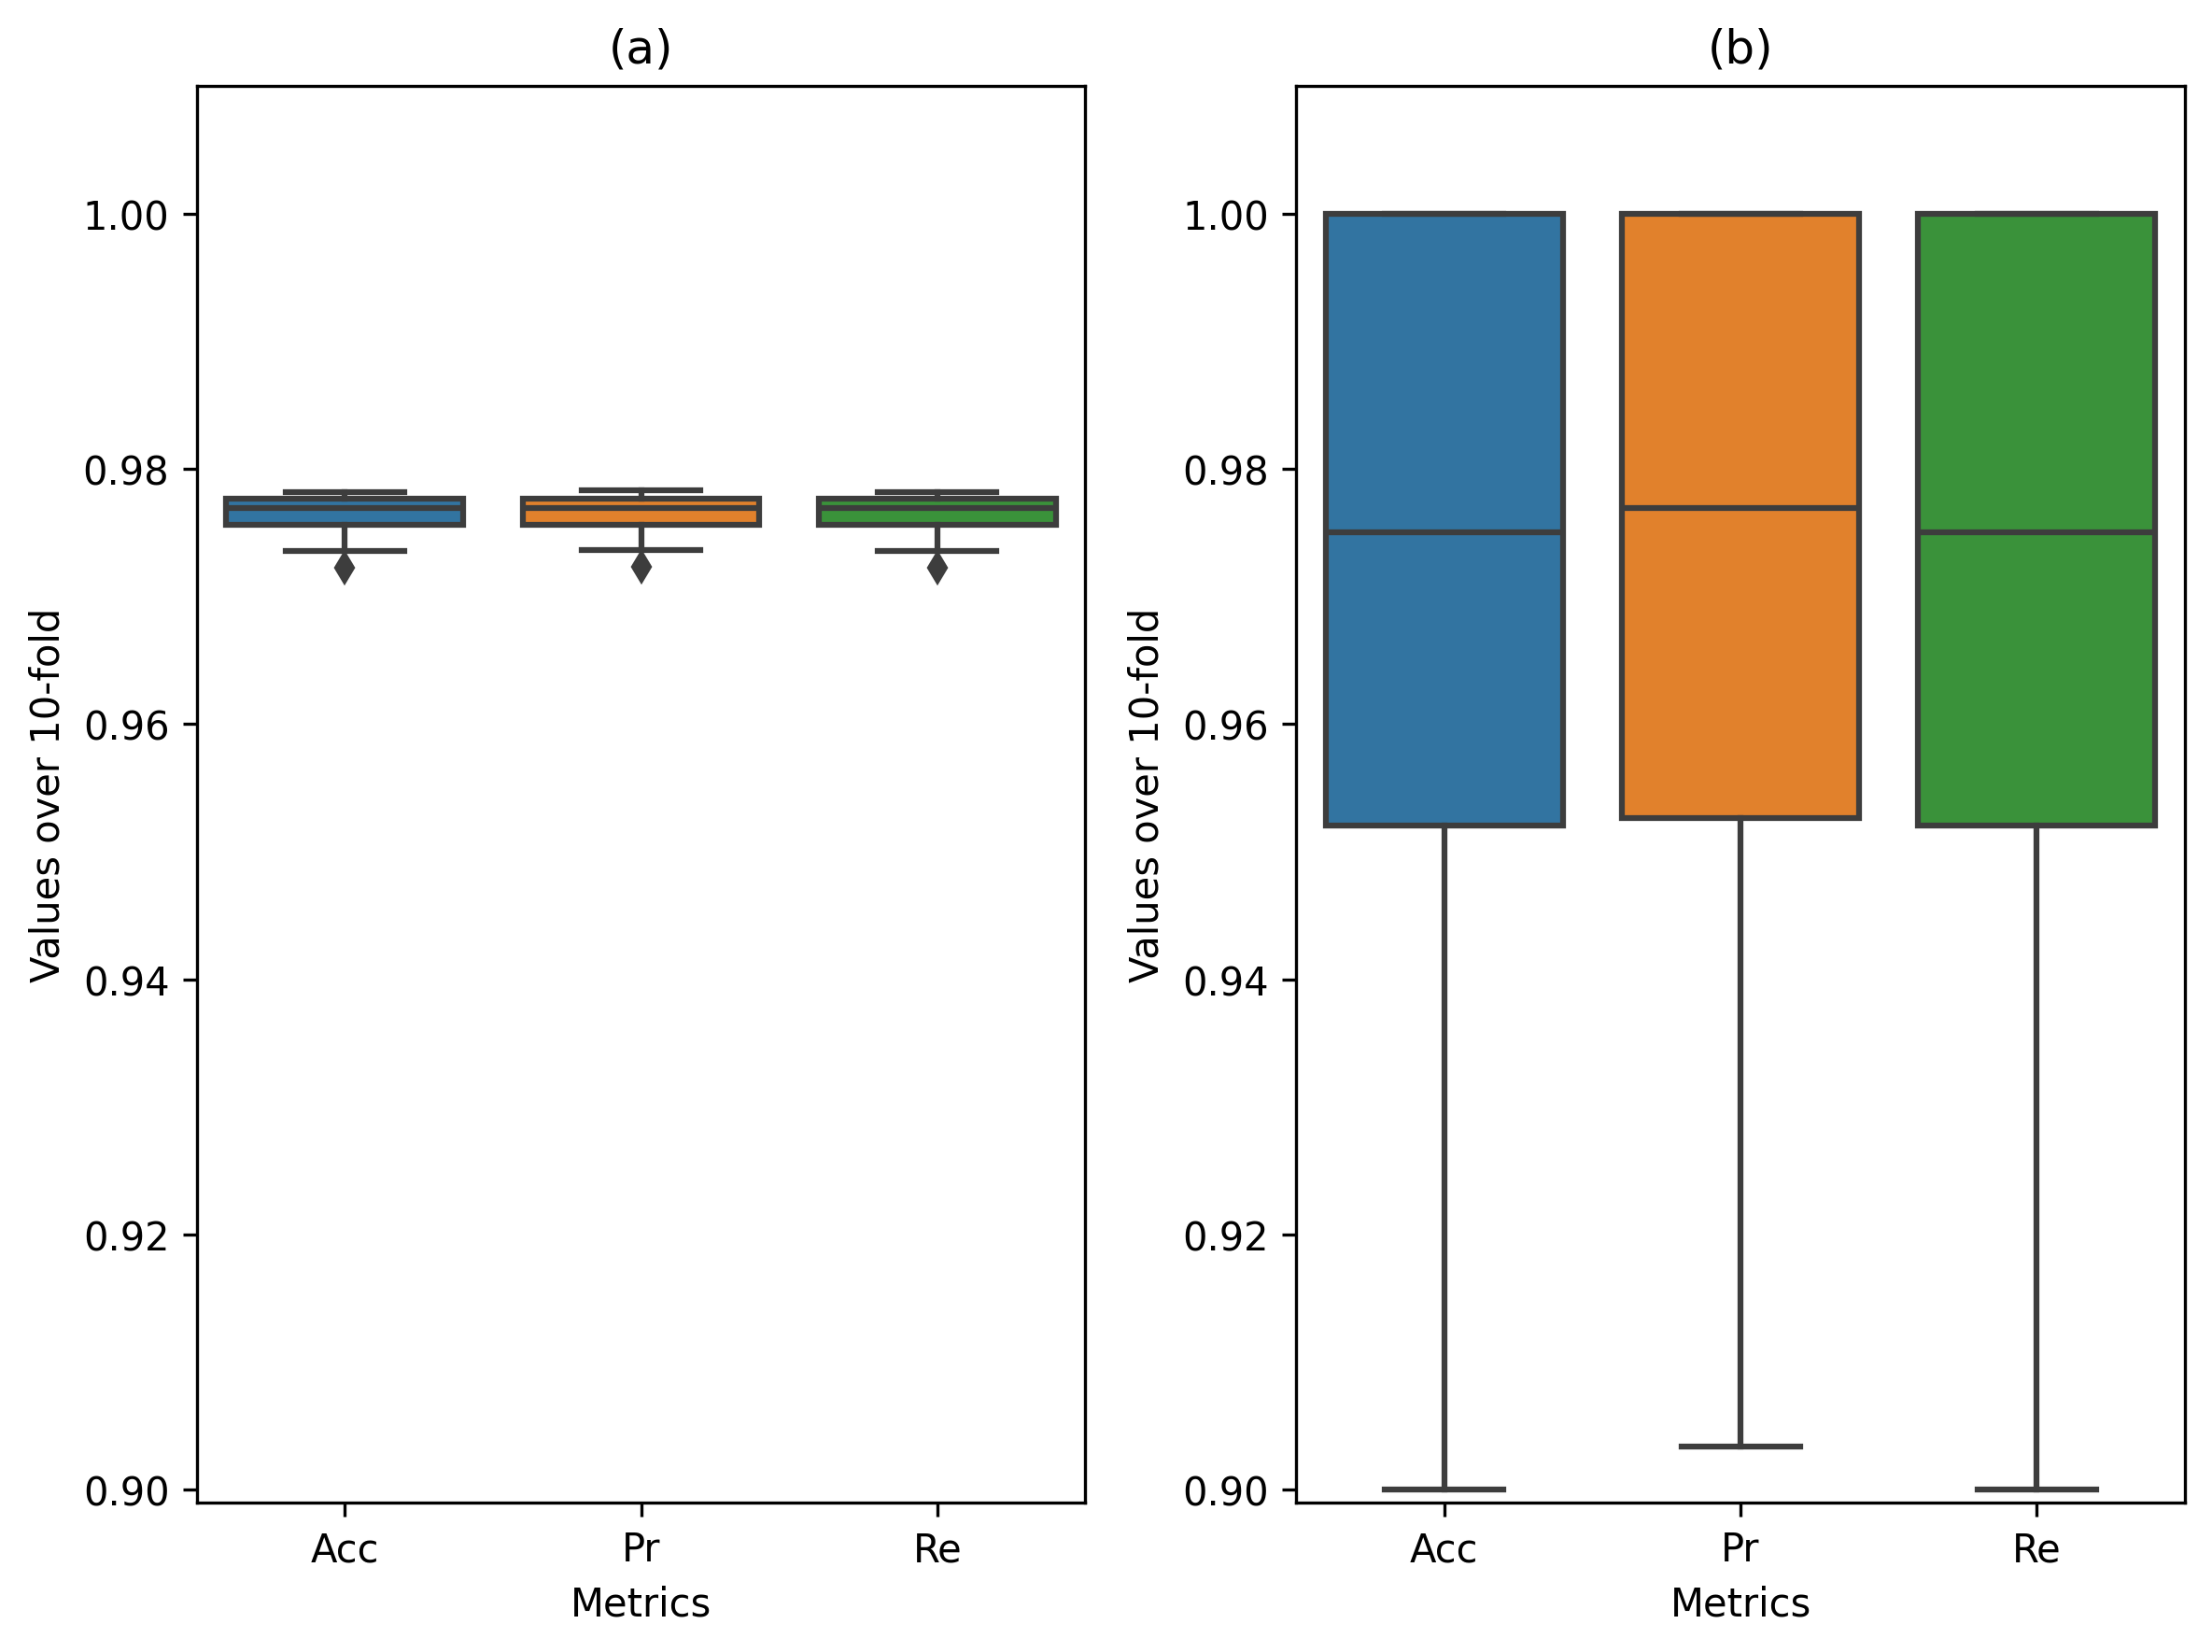

In [25]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.tight_layout()
plt.show()

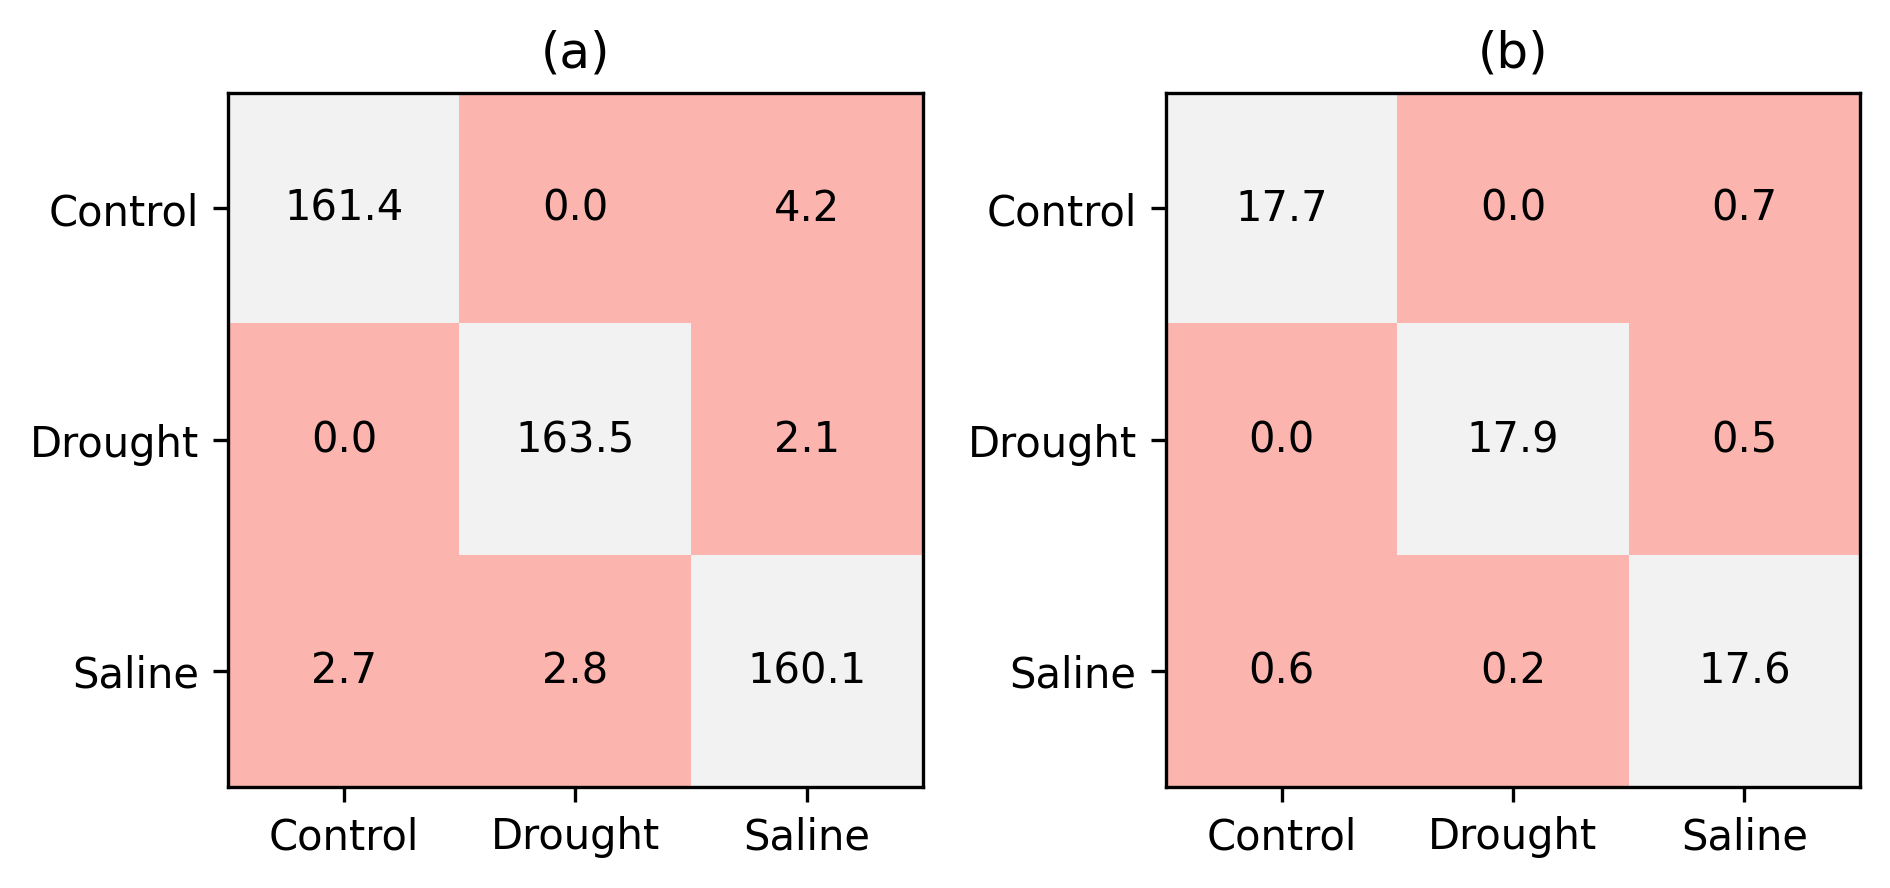

In [26]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Drought", "Saline"]

MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [27]:
single_data_point = {
    'GERM': 96,
    'SL': 7.5,
    'RL': 8.5,
    'TL': 16,
    'SDM': 35.9,
    'RDM': 21.2,
    'TDM': 57.1
}

input_data_single = pd.DataFrame([single_data_point])
prediction_single = clf.predict(input_data_single)

print("Predicted Class:", prediction_single[0])


Predicted Class: 2


c:\Users\Happy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [28]:
'''
Checks which cultivars generate the most prediction errors
'''

Cultivars_errs_train = []
Cultivars_errs_test = []

group_kfold = GroupKFold(n_splits=10)
knn_params = {
    'p':1,
    'n_neighbors': 5,  # Number of neighbors
    'weights': 'uniform',  # Weight function used in prediction
    'algorithm': 'auto',  # Algorithm used to compute the nearest neighbors
}
for train_index, test_index in group_kfold.split(X, y, Cultivar):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = KNeighborsClassifier(**knn_params)  
  clf.fit(X_train, y_train)

  for i, x_train in enumerate(X_train):
    y_pred_train = clf.predict(x_train.reshape(1, -1))[0]
    if y_pred_train != y_train[i]:
      Cultivars_errs_train.append([Cultivar[train_index[i]], y_train[i], y_pred_train])

  for i, x_test in enumerate(X_test):
    y_pred_test = clf.predict(x_test.reshape(1, -1))[0]
    if y_pred_test != y_test[i]:
      Cultivars_errs_test.append([Cultivar[test_index[i]], y_test[i], y_pred_test])

In [29]:
Cultivares_errs_train_ = []
last_cultivar = None
for cultivar in Cultivars_errs_train:
  if cultivar != last_cultivar:
    Cultivares_errs_train_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_train_ = np.array(Cultivares_errs_train_)
Cultivares_errs_name_train = list(Cultivares_errs_train_[:,0])

Cultivares_errs_test_ = []
last_cultivar = None
for cultivar in Cultivars_errs_test:
  if cultivar != last_cultivar:
    Cultivares_errs_test_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_test_ = np.array(Cultivares_errs_test_)
Cultivares_errs_name_test = list(Cultivares_errs_test_[:,0])

In [30]:
print('Cultivars with more prediction errors')

print('> Training')
for cultivar in Cultivares_errs_name_train:
  print(cultivar, ': ', Cultivares_errs_name_train.count(cultivar), ' # ', end='')

print('\n> Test')
for cultivar in Cultivares_errs_name_test:
  print(cultivar, ': ', Cultivares_errs_name_test.count(cultivar), ' # ', end='')

Cultivars with more prediction errors
> Training
5D 615 RR :  9  # 5G 830 RR :  2  # FPS solimoes RR :  8  # NS 6909 IPRO :  9  # CG 8166 RR :  1  # FPS Paranapanema RR :  7  # RK 6813 RR :  9  # DESAFIO RR :  9  # 5D 6215 IPRO :  9  # 5G 830 RR :  2  # DESAFIO RR :  9  # FPS solimoes RR :  8  # NS 5151 IPRO :  2  # NS 6909 IPRO :  9  # FPS Paranapanema RR :  7  # M7110 IPRO  :  9  # RK 6813 RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  9  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # CD 238 RR :  2  # FPS solimoes RR :  8  # NS 6909 IPRO :  9  # FPS Paranapanema RR :  7  # M7110 IPRO  :  9  # RK 6813 RR :  9  # PONTA IPRO :  9  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # NS 5151 IPRO :  2  # NS 6909 IPRO :  9  # NS 7338 IPRO :  2  # FPS Paranapanema RR :  7  # M7110 IPRO  :  9  # RK 6813 RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  9  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # NS 6909 IPRO :  9  # CG 67 RR :  1  # M7110 IPRO  :  9  # RK 6813 RR :  9  # PONTA IPRO :  9  # 5D 615 RR :  9  # 5D 6215 

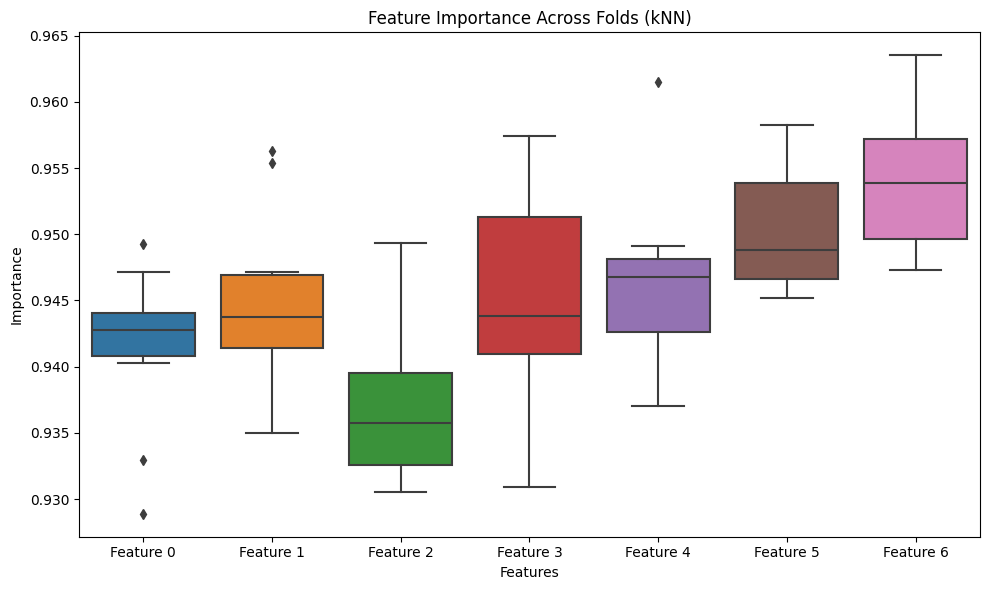

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,0.949265,0.955388,0.949306,0.957429,0.961469,0.955388,0.963510
1,0.947184,0.947143,0.936939,0.953265,0.949143,0.949224,0.959347
2,0.928898,0.934980,0.930939,0.930939,0.937061,0.949265,0.947265
3,0.943143,0.945184,0.932939,0.939102,0.943143,0.947306,0.953429
4,0.943184,0.939143,0.947224,0.943224,0.947224,0.955388,0.957469
5,0.932980,0.941143,0.935102,0.945265,0.947265,0.945224,0.953388
6,0.942353,0.942392,0.930549,0.942431,0.942431,0.948431,0.948392
7,0.944392,0.956275,0.940431,0.956353,0.948392,0.958235,0.956314
8,0.942275,0.946353,0.936431,0.944392,0.946353,0.946353,0.954314
9,0.940275,0.942353,0.932471,0.940431,0.942392,0.946392,0.948431


In [31]:

# Initialize an empty list to store feature importances
importances = []

# Define the parameters for kNN classifier
knn_params = {
    'p':1,
    'n_neighbors': 5,  # Number of neighbors
    'weights': 'uniform',  # Weight function used in prediction
    'algorithm': 'auto',  # Algorithm used to compute the nearest neighbors
}

# Iterate over folds of cross-validation
for train_index, test_index in group_kfold.split(X, y, Cultivar):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize kNN classifier
    clf = KNeighborsClassifier(**knn_params)
    
    # Fit the kNN classifier on training data
    clf.fit(X_train, y_train)

    # Evaluate the performance of kNN classifier on the current fold
    # by computing the mean accuracy after removing each feature
    fold_importance = []
    for i in range(X_train.shape[1]):
        X_train_subset = np.delete(X_train, i, axis=1)
        scores = cross_val_score(clf, X_train_subset, y_train, cv=10)
        fold_importance.append(np.mean(scores))
    
    # Append the importance scores for the current fold
    importances.append(fold_importance)

# Convert importances list to numpy array
importances = np.array(importances)

# Create a DataFrame to hold feature importances
df = pd.DataFrame(importances, columns=['Feature {}'.format(i) for i in range(X.shape[1])])

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Across Folds (kNN)')
plt.tight_layout()
plt.show()

# Display the DataFrame
display(df)
